<a href="https://colab.research.google.com/github/Sarinda251/CAP_5415/blob/main/HW3_P1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [2]:
# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [3]:
# scale pixels
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
trainX = train_norm / 255.0
testX = test_norm / 255.0
# return normalized images

In [4]:
# create model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
# fit model
history1 = model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY))
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

Epoch 1/30
782/782 [==============================] - 259s 331ms/step - loss: 1.7268 - accuracy: 0.3824 - val_loss: 1.4874 - val_accuracy: 0.4723
Epoch 2/30
782/782 [==============================] - 263s 336ms/step - loss: 1.3848 - accuracy: 0.5040 - val_loss: 1.2568 - val_accuracy: 0.5594
Epoch 3/30
782/782 [==============================] - 258s 330ms/step - loss: 1.2153 - accuracy: 0.5662 - val_loss: 1.1693 - val_accuracy: 0.5858
Epoch 4/30
782/782 [==============================] - 259s 331ms/step - loss: 1.0875 - accuracy: 0.6174 - val_loss: 1.0641 - val_accuracy: 0.6246
Epoch 5/30
782/782 [==============================] - 259s 331ms/step - loss: 0.9972 - accuracy: 0.6514 - val_loss: 1.0496 - val_accuracy: 0.6322
Epoch 6/30
782/782 [==============================] - 259s 331ms/step - loss: 0.9222 - accuracy: 0.6780 - val_loss: 0.9822 - val_accuracy: 0.6589
Epoch 7/30
782/782 [==============================] - 260s 332ms/step - loss: 0.8591 - accuracy: 0.7008 - val_loss: 0.9494 -

In [9]:
print('accuracy: %.3f' % (acc * 100.0))

accuracy: 71.070


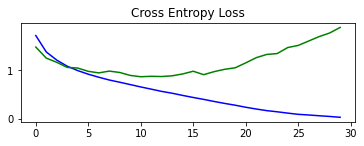

In [6]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history1.history['loss'], color='blue', label='train')
plt.plot(history1.history['val_loss'], color='green', label='test')
plt.show()

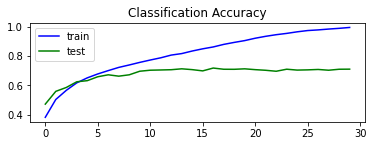

In [7]:
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history1.history['accuracy'], color='blue', label='train')
plt.plot(history1.history['val_accuracy'], color='green', label='test')
plt.legend()
plt.show()